Advanced: Plotting Options
============================

For basic plotting usage, see the [plotting tutorial](plotting.ipynb)

PHOEBE 2.3 uses [autofig 1.1](https://autofig.readthedocs.io/en/1.1.0) as an intermediate layer for highend functionality to [matplotlib](http://matplotlib.org).

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.3 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.3,<2.4"

This first line is only necessary for ipython noteboooks - it allows the plots to be shown on this page instead of in interactive mode.  Depending on your version of Jupyter, Python, and matplotlib - you may or may not need this line in order to see plots in the notebook.

In [2]:
%matplotlib inline

In [3]:
import phoebe
from phoebe import u # units
import numpy as np

logger = phoebe.logger()

First we're going to create some fake observations so that we can show how to plot observational data.  In real life, we would use something like [np.loadtxt](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) to get arrays from a data file instead.

In [4]:
b = phoebe.default_binary()
b.add_dataset('lc', compute_phases=phoebe.linspace(0,1,101))
b.run_compute(irrad_method='none')

times = b.get_value('times', context='model')
fluxes = b.get_value('fluxes', context='model') + np.random.normal(size=times.shape) * 0.01
sigmas = np.ones_like(times) * 0.05

Now we'll create a new Bundle and attach an orbit dataset (without observations) and a light curve dataset (with our "fake" observations - see [Datasets](datasets.ipynb) for more details):

In [5]:
b = phoebe.default_binary()
b.set_value('q', 0.8)
b.set_value('ecc', 0.1)
b.set_value('irrad_method', 'none')

In [6]:
b.add_dataset('orb', compute_times=np.linspace(0,4,1000), dataset='orb01', component=['primary', 'secondary'])
b.add_dataset('lc', times=times, fluxes=fluxes, sigmas=sigmas, dataset='lc01')

<ParameterSet: 42 parameters | contexts: compute, dataset, constraint, figure>

And run several forward models.  See [Computing Observables](compute.ipynb) for more details.

In [7]:
b.set_value('incl@orbit', 90)
b.run_compute(model='run_with_incl_90') 

b.set_value('incl@orbit', 85)
b.run_compute(model='run_with_incl_85')

b.set_value('incl@orbit', 80)
b.run_compute(model='run_with_incl_80')

<ParameterSet: 17 parameters | kinds: lc, orb>

Time (highlight and uncover)
----------------------------------------------

The built-in plot method also provides convenience options to either highlight the interpolated point for a given time, or only show the dataset up to a given time.

### Highlight

The higlight option is enabled by default so long as a time (or times) is passed to plot.  It simply adds an extra marker at the sent time - interpolating in the synthetic model if necessary.

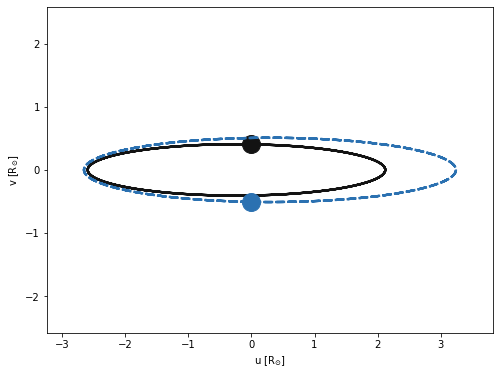

In [8]:
afig, mplfig = b['orb@run_with_incl_80'].plot(time=1.0, show=True)

To change the style of the "highlighted" points, you can pass matplotlib recognized [markers](http://matplotlib.org/api/markers_api.html), [colors](http://matplotlib.org/api/colors_api.html), and markersizes to the highlight_marker, highlight_color, and highlight_ms keywords, respectively.

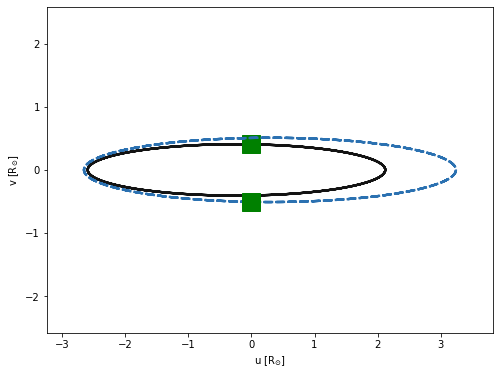

In [9]:
afig, mplfig = b['orb@run_with_incl_80'].plot(time=1.0, 
                                              highlight_marker='s', 
                                              highlight_color='g', 
                                              highlight_ms=20, 
                                              show=True)

To disable highlighting, simply send highlight=False

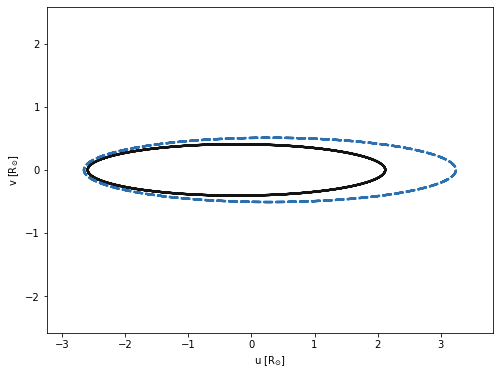

In [10]:
afig, mplfig = b['orb@run_with_incl_80'].plot(time=1.0, 
                                              highlight=False, 
                                              show=True)

### Uncover

Uncover shows the observations or synthetic model up to the provided time and is disabled by default, even when a time is provided, but is enabled simply by providing uncover=True.  There are no additional options available for uncover.



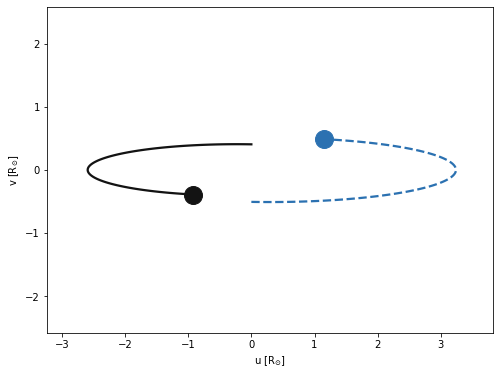

In [11]:
afig, mplfig = b['orb@run_with_incl_80'].plot(time=0.5, 
                                              uncover=True, 
                                              show=True)

Units
---------------------

Likewise, each array that is plotted is automatically plotted in its default units. To override these defaults, simply provide the unit (as a string or as a astropy units object) for a given axis.

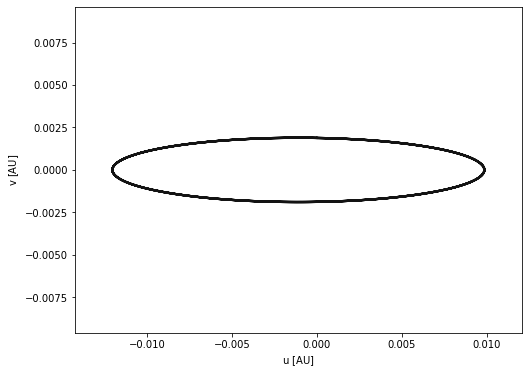

In [12]:
afig, mplfig = b['orb01@primary@run_with_incl_80'].plot(xunit='AU', yunit='AU', show=True)

**WARNING**: when plotting two arrays with the same dimensions, PHOEBE attempts to set the aspect ratio to equal, but overriding to use two different units will result in undesired results.  This may be fixed in the future, but for now can be avoided by using consistent units for the x and y axes when they have the same dimensions.

Axes Labels
--------------------

Axes labels are automatically generated from the qualifier of the array and the plotted units.  To override these defaults, simply pass a string for the label of a given axis.

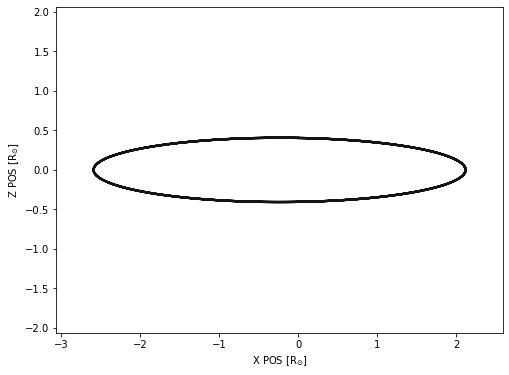

In [13]:
afig, mplfig = b['orb01@primary@run_with_incl_80'].plot(xlabel='X POS', ylabel='Z POS', show=True)

Axes Limits
----------------------

Axes limits are determined by the data automatically.  To set custom axes limits, either use matplotlib methods on the returned axes objects, or pass limits as a list or tuple.

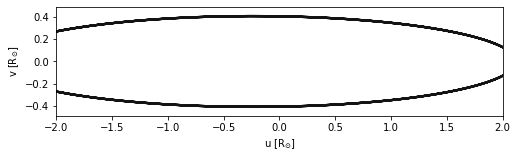

In [14]:
afig, mplfig = b['orb01@primary@run_with_incl_80'].plot(xlim=(-2,2), show=True)

Errorbars
------------

In the cases of observational data, errorbars can be added by passing the name of the column.

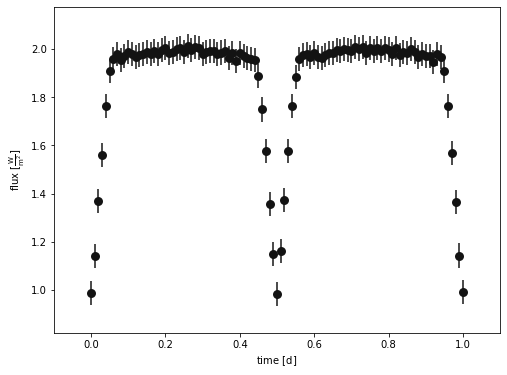

In [15]:
afig, mplfig = b['lc01@dataset'].plot(yerror='sigmas', show=True)

To disable the errorbars, simply set yerror=None.

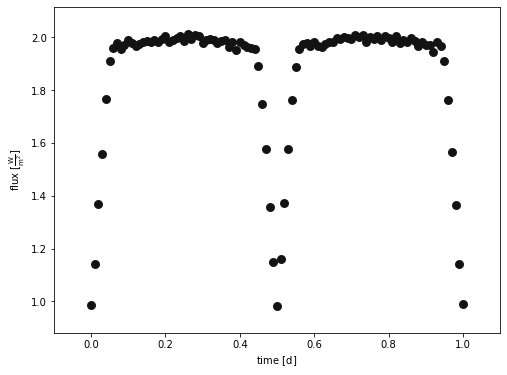

In [16]:
afig, mplfig = b['lc01@dataset'].plot(yerror=None, show=True)

Colors
----------------------

Colors of points and lines, by default, cycle according to matplotlib's color policy.  To manually set the color, simply pass a matplotlib recognized [color](http://matplotlib.org/api/colors_api.html) to the 'c' keyword.

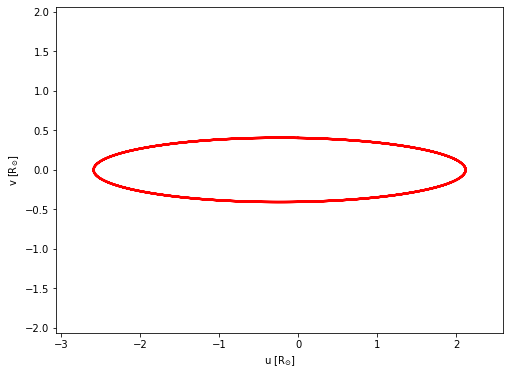

In [17]:
afig, mplfig = b['orb01@primary@run_with_incl_80'].plot(c='r', show=True)

In addition, you can point to an array in the dataset to use as color.

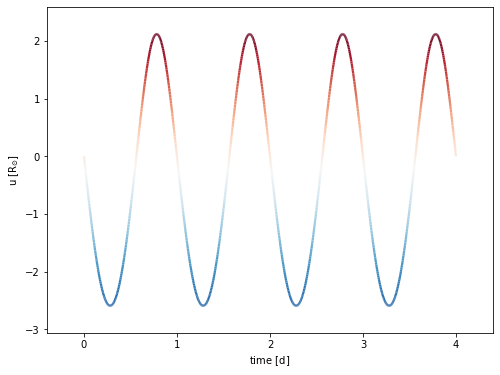

In [18]:
afig, mplfig = b['orb01@primary@run_with_incl_80'].plot(x='times', c='vws', show=True)

Choosing colors works slightly differently for meshes (ie you can set fc for facecolor and ec for edgecolor).  For more details, see the tutorial on the [MESH dataset](MESH.ipynb).

### Colormaps

The colormaps is determined automatically based on the parameter used for coloring (ie RVs will be a red-blue colormap).  To override this, pass a matplotlib recognized [colormap](http://matplotlib.org/api/pyplot_summary.html#matplotlib.pyplot.colormaps) to the cmap keyword.

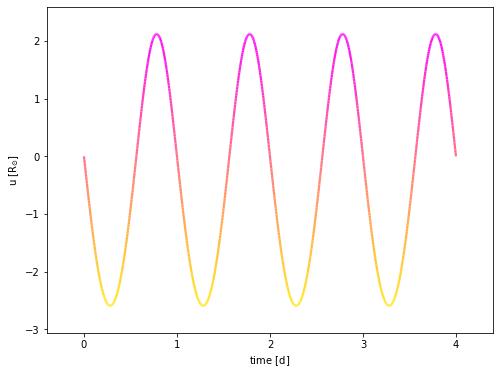

In [19]:
afig, mplfig = b['orb01@primary@run_with_incl_80'].plot(x='times', c='vws', cmap='spring', show=True)

### Adding a Colorbar

To add a colorbar (or sizebar, etc), send draw_sidebars=True to the plot call.

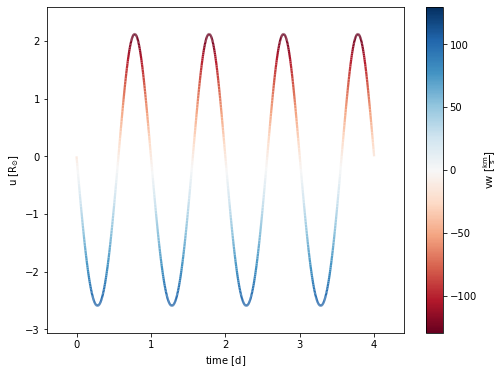

In [20]:
afig, mplfig = b['orb01@primary@run_with_incl_80'].plot(x='times', c='vws', draw_sidebars=True, show=True)

Labels and Legends
-----------------------

To add a legend, include legend=True.

For details on placement and formatting of the legend see [matplotlib's documentation](http://matplotlib.org/users/legend_guide.html#plotting-guide-legend).

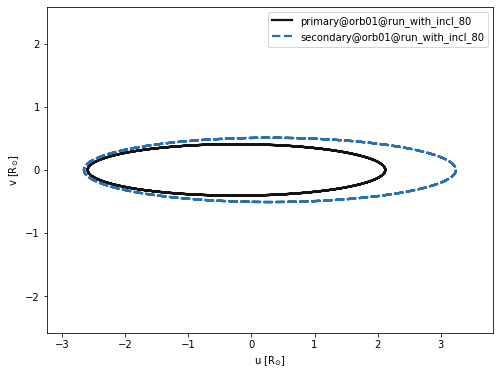

In [21]:
afig, mplfig = b['orb@run_with_incl_80'].plot(show=True, legend=True)

The legend labels are generated automatically, but can be overriden by passing a string to the label keyword.

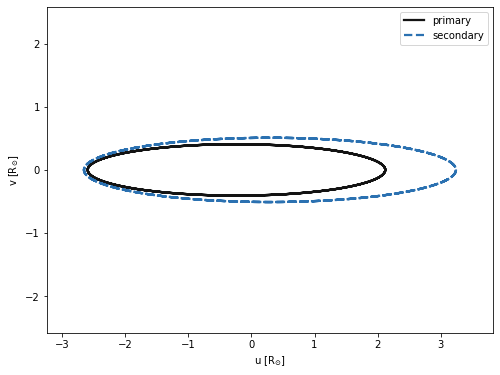

In [22]:
afig, mplfig = b['primary@orb@run_with_incl_80'].plot(label='primary')
afig, mplfig = b['secondary@orb@run_with_incl_80'].plot(label='secondary', legend=True, show=True)

To override the position or styling of the legend, you can pass valid options to legend_kwargs which will be passed on to [plt.legend](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html)

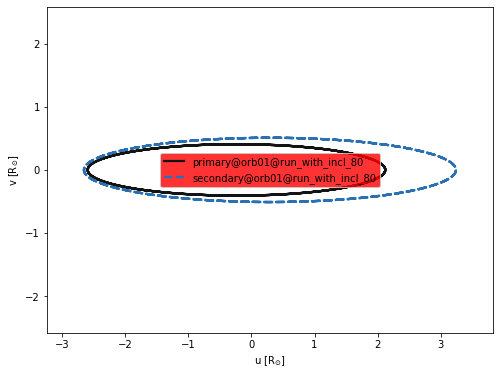

In [23]:
afig, mplfig = b['orb@run_with_incl_80'].plot(show=True, legend=True, legend_kwargs={'loc': 'center', 'facecolor': 'r'})

Other Plotting Options
----------------------

Valid plotting options that are directly passed to matplotlib include:
- linestyle
- marker

Note that sizes (markersize, linewidth) should be handled by passing the size to 's' and attempting to set markersize or linewidth directly will raise an error.  See also the [autofig documention on size scales](https://autofig.readthedocs.io/en/1.1.0/tutorials/size_modes/).


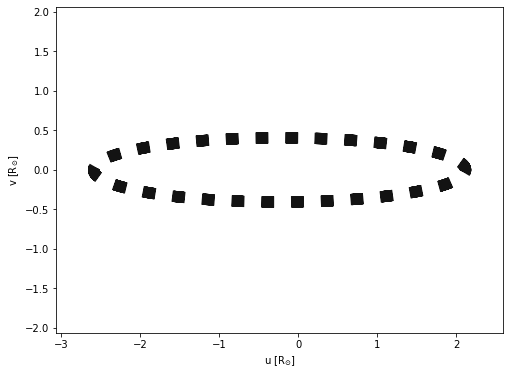

In [24]:
afig, mplfig = b['orb01@primary@run_with_incl_80'].plot(linestyle=':', s=0.1, show=True)

3D Axes
-------------

To plot a in 3d, simply pass projection='3d' to the plot call.  To override the defaults for the z-direction, pass a twig or array just as you would for x or y.

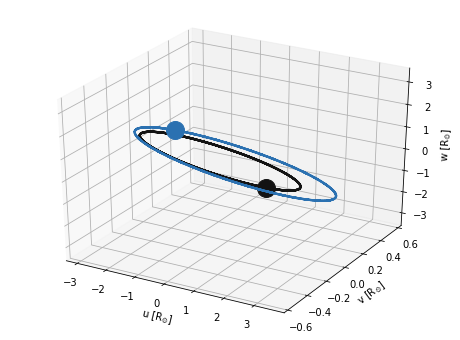

In [25]:
afig, mplfig = b['orb@run_with_incl_80'].plot(time=0, projection='3d', show=True)